In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# DATA COLLECTION AND ANALYSIS

In [2]:
#loading the data from csv file to a pandas dataframe
customer_data=pd.read_csv("Mall_Customers.csv")

In [3]:
#first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
#getting some information about the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
#checking missing values
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# choosing annual income column & spending  score column


In [16]:
x=customer_data.iloc[: ,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# choosing number of clusters

#  wcss--within  clusters sum of squares

In [24]:
#finding wcss value for different number of clusters
wcss=[]
for i  in range(1,11):
    kmeans=KMeans(n_clusters =i,init='k-means++',random_state=42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

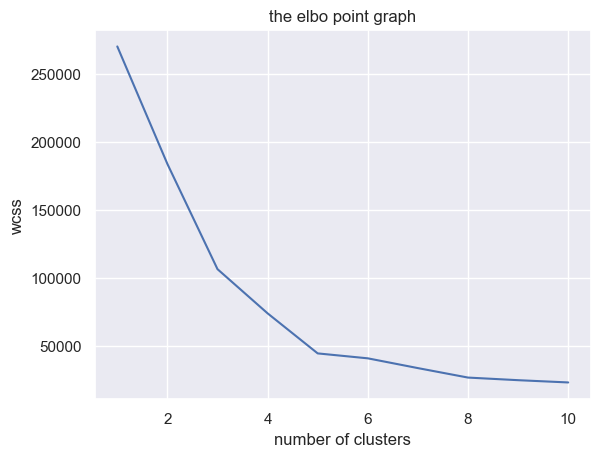

In [22]:
# plot an elbow grapg
sns.set()
plt.plot(range(1,11),wcss)
plt.title("the elbo point graph")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

# OPTIMUM NUMBER OF CLUSTERS=5
# TRAINING THE K-MEANS CLUSTERING MODEL

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
# return  a label for each data point based on their  cluster
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# visualizationall the clusters

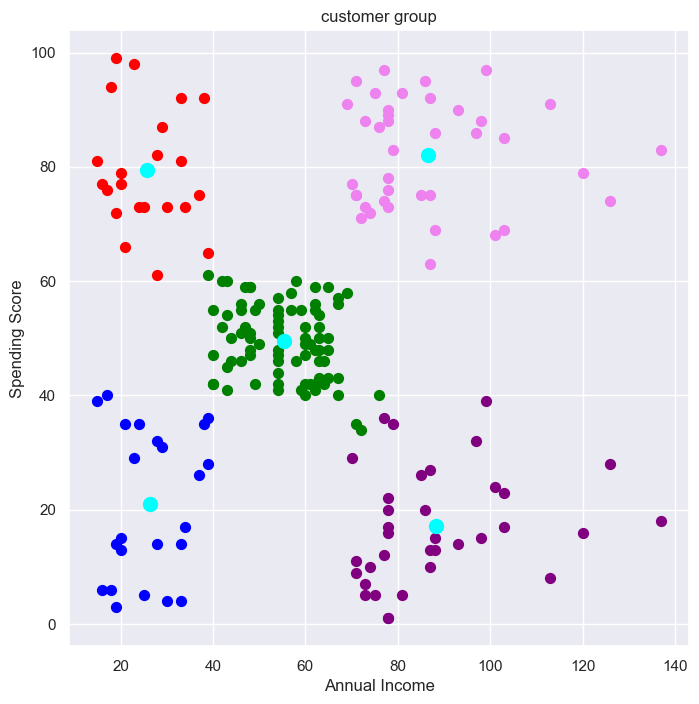

In [30]:
# ploting all theclusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='violet',label='Cluster 1')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='purple',label='Cluster 1')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='blue',label='Cluster 1')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='red',label='Cluster 1')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroid')
plt.title('customer group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()